In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv("2-multiplegradesdataset.csv")

In [7]:
df.head(3)

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1


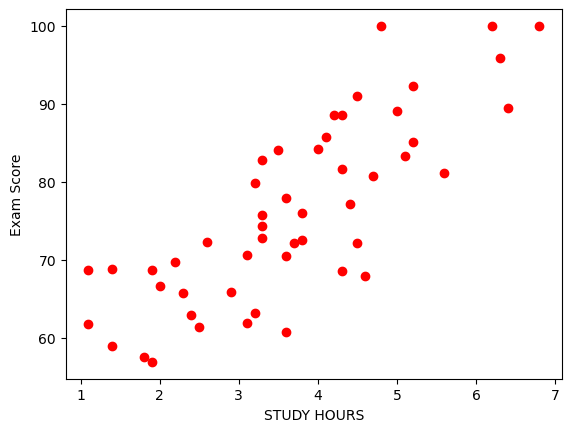

In [19]:
plt.scatter(df["Study Hours"],df["Exam Score"],color="r")
plt.xlabel("STUDY HOURS")
plt.ylabel("Exam Score")
plt.show()

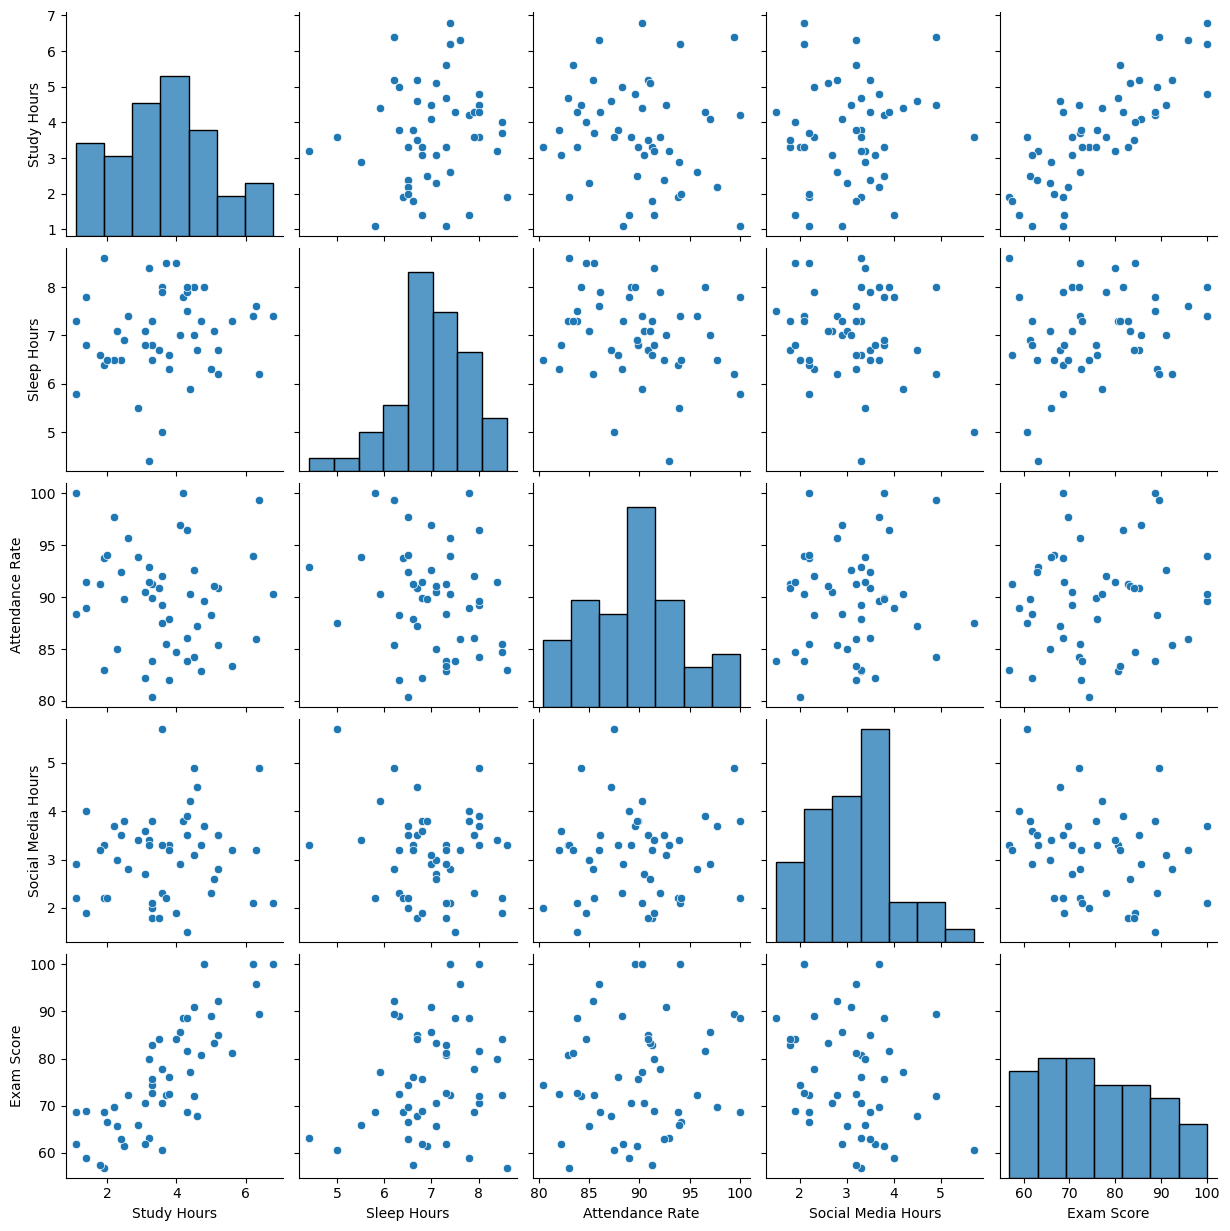

In [15]:
sns.pairplot(df)

In [17]:
df.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


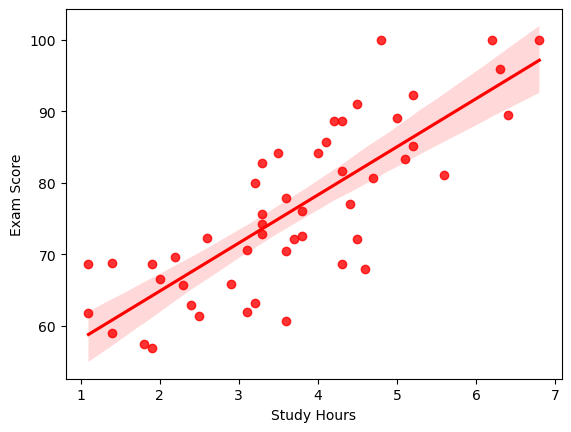

In [27]:
sns.regplot(x=df["Study Hours"],y=df["Exam Score"],color="r")
plt.show()

In [29]:
#model eğitim

In [31]:
df.tail()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
45,2.9,5.5,93.9,3.4,65.9
46,3.3,7.3,83.8,2.1,72.8
47,5.6,7.3,83.4,3.2,81.1
48,4.5,7.0,92.6,3.1,91.0
49,1.4,6.8,91.5,1.9,68.8


In [33]:
#independet ,dependent features

In [226]:
#X=df[["Study Hours","Sleep Hours","Attendance Rate","Social Media Hours"]]
#y=df["Exam Score"]

#Buda kullanılabilir fakat y dizisi için exam score en son kolonda olması lazım
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [228]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [230]:
y.head()

0    80.7
1    76.0
2    89.1
3    95.9
4    70.5
Name: Exam Score, dtype: float64

In [232]:
#train_test_split

In [234]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [236]:
from sklearn.preprocessing import StandardScaler

In [238]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [240]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [242]:
regression.fit(X_train,y_train)

LinearRegression()

In [244]:
y_pred=regression.predict(X_test)

In [246]:
#prediction and Performans Metric
y_pred=regression.predict(X_test)

In [248]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mae:",mae)
print("mse:",mse)
print("rmse",rmse)

Mae: 3.277026485962788
mse: 14.600589378986278
rmse 3.821071757895457


In [250]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print("r2 score: ", score)
#adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

r2 score:  0.9156707345772709
0.8735061018659063


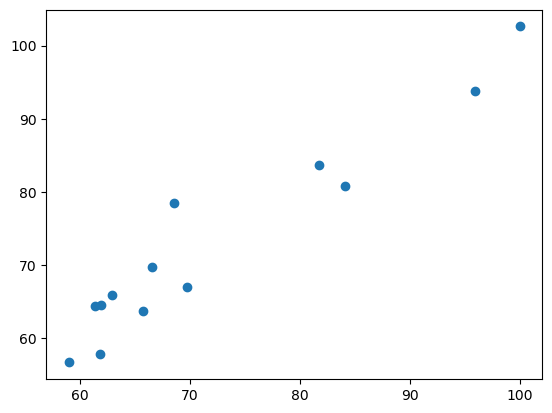

In [252]:
plt.scatter(y_test,y_pred)

In [254]:
residuals=y_test-y_pred
print(residuals)

35    2.652956
37    3.894544
41   -1.930848
26    2.006006
38   -3.130796
43    3.335144
3     2.135550
33   -3.039535
30   -2.686757
36   -9.822961
14    2.321394
16   -3.040466
20   -2.604386
Name: Exam Score, dtype: float64


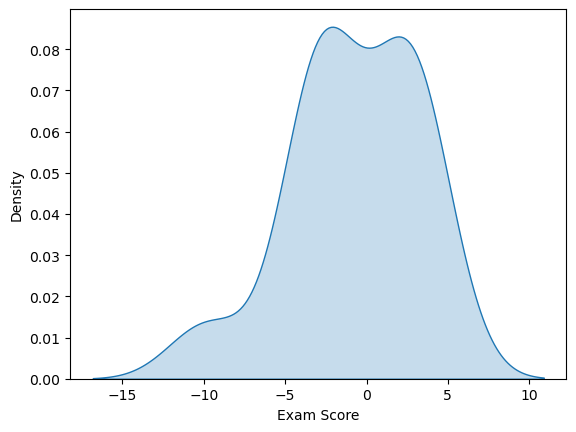

In [256]:
sns.kdeplot(residuals, fill=True)  # fill=True alanı doldurur
plt.show()

In [257]:
regression.intercept_

77.41081081081082

In [260]:
regression.coef_


array([ 9.28014703,  1.78967062,  3.24340001, -4.08127695])

In [262]:
new_student = [[5, 7, 90, 2]]  # 5 study hours, 7 sleep hours, %90 attendance, 2 social media hours

In [264]:
new_student_scaled = scaler.transform(new_student)

C:\Users\abaci\AppData\Local\Programs\Orange3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [266]:
predicted_score = regression.predict(new_student_scaled)

In [268]:
predicted_score

array([90.88471349])

In [270]:
y.describe()


count     50.00000
mean      76.07000
std       11.70915
min       56.90000
25%       68.07500
50%       73.55000
75%       84.17500
max      100.00000
Name: Exam Score, dtype: float64

In [272]:
# [study hours, sleep hours, attendance,  social media hours]
students=[
    [4,6,68,3],
    [1,10,25,6],
    [6,7,92,2]
]

In [274]:
regression.predict(scaler.transform(students))

C:\Users\abaci\AppData\Local\Programs\Orange3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([63.06404124,  7.69382635, 99.51929243])